In [1]:
import torch
from torch.optim import Adam

import pickle
import soundfile as sf
import IPython.display as ipd

from constants import *
from train import train_model
from early_stopper import EarlyStopper

from phase_loss import PhaseLoss
from magnitude_loss import MagnitudeLoss

from dataset import build_data_loaders
from disk_utils import save_model, load_model
from plotter import plot_loss, plot_heatmaps, plot_waves
from predict import predict_polar, get_phases, make_wav

from models.model_0 import Model_0
from models.model_1 import Model_1

In [2]:
USE_GPU = True

num_epochs = 250
test_size = 0.1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if not USE_GPU:
    device = torch.device("cpu")
    num_epochs = 1

In [3]:
with open("dataset/features/min_max.pkl", "rb") as handle:
    min_max = pickle.load(handle)

model = Model_1(in_channels=1, out_channels=1, base_features=32)
part = "db"
train_data_loader, test_data_loader = build_data_loaders(
    min_max, part=part, test_size=test_size)

mini = min_max["ney"]["min"][part]
maxi = min_max["ney"]["max"][part]

    
criterion = MagnitudeLoss(mini, maxi)
optimizer = Adam(model.parameters(), lr=2e-4)
es = EarlyStopper(10, 0)

In [4]:
model, history = train_model(
    model,
    criterion,
    optimizer,
    device,
    train_data_loader, test_data_loader,
    es,
    num_epochs=num_epochs
)

Starting training...
E: 001/250	 T: 81.218725	 V: 45.258388
E: 002/250	 T: 30.446557	 V: 45.154691
E: 003/250	 T: 25.382133	 V: 39.249294
E: 004/250	 T: 23.150672	 V: 41.889780
E: 005/250	 T: 22.025440	 V: 43.589956
E: 006/250	 T: 21.295595	 V: 38.092786
E: 007/250	 T: 20.816897	 V: 41.011994
E: 008/250	 T: 20.298885	 V: 39.729435
E: 009/250	 T: 19.882680	 V: 41.760017
E: 010/250	 T: 19.513699	 V: 39.777236
E: 011/250	 T: 19.042277	 V: 40.717928
E: 012/250	 T: 18.762619	 V: 42.655375
E: 013/250	 T: 18.303338	 V: 41.380073
E: 014/250	 T: 17.661726	 V: 41.648106
E: 015/250	 T: 16.875094	 V: 41.159636
E: 016/250	 T: 15.764663	 V: 42.953268
Stopping early...


In [5]:
model.to(torch.device("cpu"))

Model_1(
  (encoder1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (encoder2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (encoder3): Sequential(
    (0): Conv2d(64, 128, kernel_si

In [8]:
del model
torch.cuda.empty_cache()

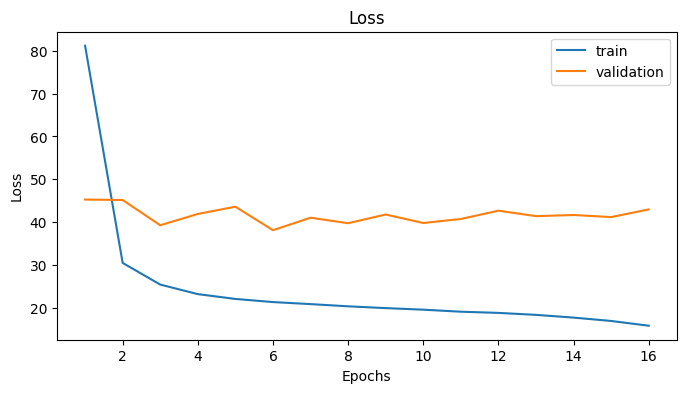

In [6]:
plot_loss(history, "Loss", start=0)

In [ ]:
model = load_model("model_19_mag")

In [7]:
pred_limit = 32
predictions, targets = predict_polar(
    model,
    test_data_loader,
    min_max["ney"]["min"][part],
    min_max["ney"]["max"][part],
    limit=pred_limit,
    from_db=(part == "db"))

Gtr_1_01/chunk_0, Gtr_1_01/chunk_1, Gtr_1_01/chunk_2, Gtr_1_01/chunk_3, Gtr_1_01/chunk_4, Gtr_1_01/chunk_5, Gtr_1_01/chunk_6, Gtr_1_01/chunk_7
Ney_1_01/chunk_0, Ney_1_01/chunk_1, Ney_1_01/chunk_2, Ney_1_01/chunk_3, Ney_1_01/chunk_4, Ney_1_01/chunk_5, Ney_1_01/chunk_6, Ney_1_01/chunk_7


--------------------------------------------------
Gtr_1_01/chunk_8, Gtr_1_01/chunk_9, Gtr_1_01/chunk_10, Gtr_1_01/chunk_11, Gtr_1_01/chunk_12, Gtr_1_01/chunk_13, Gtr_1_01/chunk_14, Gtr_1_01/chunk_15
Ney_1_01/chunk_8, Ney_1_01/chunk_9, Ney_1_01/chunk_10, Ney_1_01/chunk_11, Ney_1_01/chunk_12, Ney_1_01/chunk_13, Ney_1_01/chunk_14, Ney_1_01/chunk_15
--------------------------------------------------
Gtr_1_01/chunk_16, Gtr_1_01/chunk_17, Gtr_1_01/chunk_18, Gtr_1_01/chunk_19, Gtr_1_01/chunk_20, Gtr_1_01/chunk_21, Gtr_1_01/chunk_22, Gtr_1_01/chunk_23
Ney_1_01/chunk_16, Ney_1_01/chunk_17, Ney_1_01/chunk_18, Ney_1_01/chunk_19, Ney_1_01/chunk_20, Ney_1_01/chunk_21, Ney_1_01/chunk_22, Ney_1_01/chunk_23
--------------------------------------------------
Gtr_1_01/chunk_24, Gtr_1_01/chunk_25, Gtr_1_01/chunk_26, Gtr_1_01/chunk_27, Gtr_1_01/chunk_28, Gtr_1_01/chunk_29, Gtr_1_01/chunk_30, Gtr_1_01/chunk_31
Ney_1_01/chunk_24, Ney_1_01/chunk_25, Ney_1_01/chunk_26, Ney_1_01/chunk_27, Ney_1_01/chunk_28, N

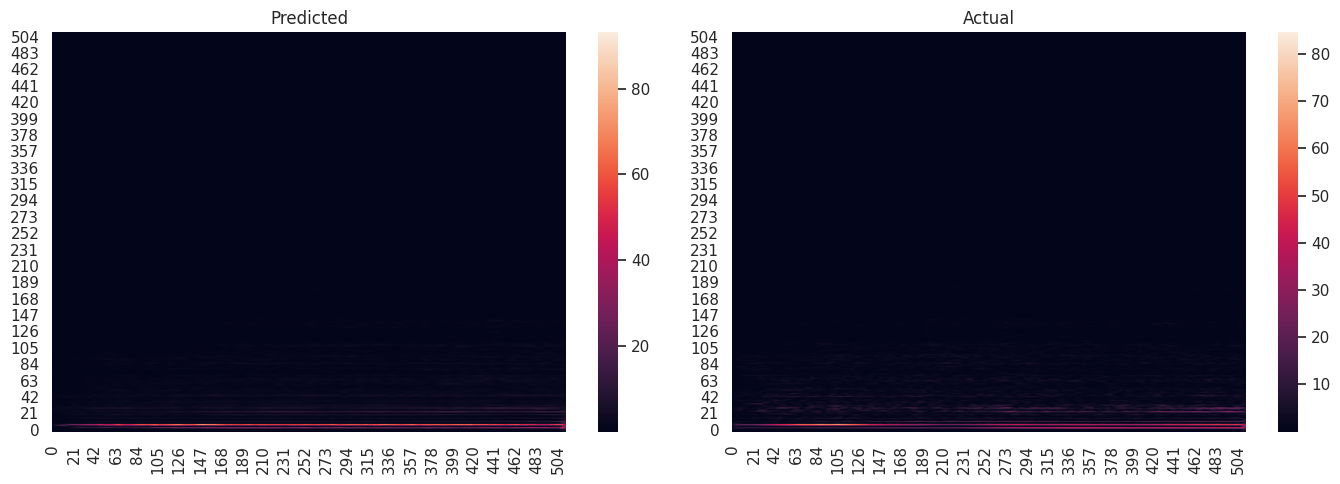

In [8]:
plot_heatmaps(predictions[0], targets[0])

In [9]:
_, test_data_loader_phase = build_data_loaders(
    min_max, part="phase", test_size=test_size)
phases = get_phases(test_data_loader_phase,
                    instrument="ney",
                    limit=pred_limit)

Ney_1_01/chunk_0, Ney_1_01/chunk_1, Ney_1_01/chunk_2, Ney_1_01/chunk_3, Ney_1_01/chunk_4, Ney_1_01/chunk_5, Ney_1_01/chunk_6, Ney_1_01/chunk_7
--------------------------------------------------
Ney_1_01/chunk_8, Ney_1_01/chunk_9, Ney_1_01/chunk_10, Ney_1_01/chunk_11, Ney_1_01/chunk_12, Ney_1_01/chunk_13, Ney_1_01/chunk_14, Ney_1_01/chunk_15
--------------------------------------------------
Ney_1_01/chunk_16, Ney_1_01/chunk_17, Ney_1_01/chunk_18, Ney_1_01/chunk_19, Ney_1_01/chunk_20, Ney_1_01/chunk_21, Ney_1_01/chunk_22, Ney_1_01/chunk_23
--------------------------------------------------
Ney_1_01/chunk_24, Ney_1_01/chunk_25, Ney_1_01/chunk_26, Ney_1_01/chunk_27, Ney_1_01/chunk_28, Ney_1_01/chunk_29, Ney_1_01/chunk_30, Ney_1_01/chunk_31
--------------------------------------------------


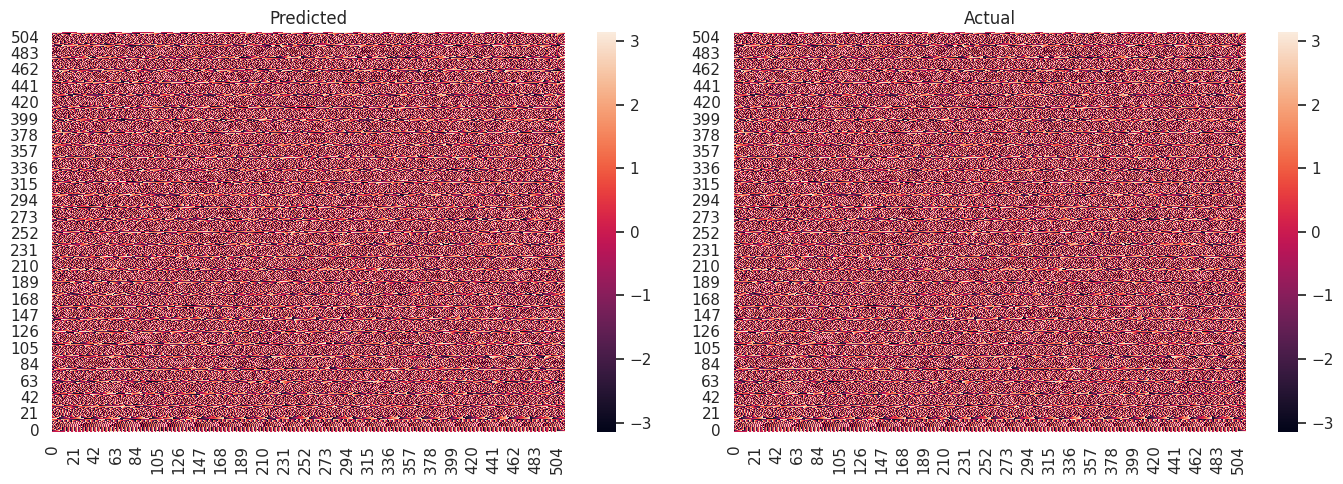

In [10]:
plot_heatmaps(phases[0], phases[0])

64448 64448


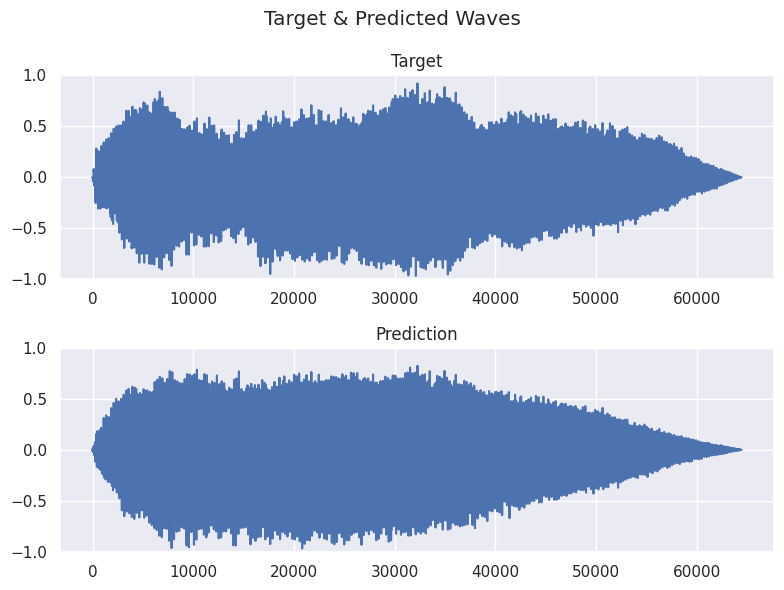

In [11]:
wave_prediction = make_wav(predictions, phases)
wave_target = make_wav(targets, phases)
print(len(wave_prediction), len(wave_target))
plot_waves(wave_target, wave_prediction)

In [ ]:
ipd.Audio(wave_target, rate=SR)

In [ ]:
ipd.Audio(wave_prediction, rate=SR)

In [12]:
sf.write("z_target.wav", wave_target, SR, format="wav")
sf.write("z_prediction.wav", wave_prediction, SR, format="wav")

In [14]:
save_model(model, "model")